# The purpose is to show the kc96

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic',\
               'k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[13])

In [11]:
filelist=os.listdir(SEDfile_dir) 

In [12]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

In [13]:
fits_files

['bulge_template.fits',
 'elliptical_template.fits',
 's0_template.fits',
 'sa_template.fits',
 'sb_template.fits',
 'sc_template.fits',
 'starb1_template.fits',
 'starb2_template.fits',
 'starb3_template.fits',
 'starb4_template.fits',
 'starb5_template.fits',
 'starb6_template.fits',
 'tupar7989a.fits']

In [14]:
#fits_files.remove('jspectype.fits')

## Find the star-names in the files

In [15]:
obj_headers = []
obj_files = []
for filename in fits_files:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [16]:
obj_names = []
index=0
for hdr in obj_headers: 
        obj_name=obj_headers[index]['TARGETID']
        obj_names.append(obj_name)
        index+=1

In [17]:
obj_names

['bulge',
 'elliptical',
 'S0',
 'Sa',
 'Sb',
 'Sc',
 'starburst1',
 'starburst2',
 'starburst3',
 'starburst4',
 'starburst5',
 'starburst6',
 'bulge']

In [18]:
filelist[:5]

['AA_README_KC96',
 'bulge_template.fits',
 'elliptical_template.fits',
 's0_template.fits',
 'sa_template.fits']

In [19]:
#obj_names2 = []
#index=0
#for thefile in fits_files:
#    #thenames=re.findall('^bk_([a-z][0-9]+).fits$',thefile)
#    thenames=re.findall('^jc_([0-9].*).fits$',thefile) 
#    if(len(thenames)>0):
#        obj_names2.append('jc_'+thenames[0])
#    else:
#        print 'bad file ',thefile
#    index+=1

In [20]:
#print obj_names2

In [21]:
#obj_names=obj_names2

In [22]:
print obj_files

['bulge_template.fits', 'elliptical_template.fits', 's0_template.fits', 'sa_template.fits', 'sb_template.fits', 'sc_template.fits', 'starb1_template.fits', 'starb2_template.fits', 'starb3_template.fits', 'starb4_template.fits', 'starb5_template.fits', 'starb6_template.fits', 'tupar7989a.fits']


In [23]:
objames_and_objfiles = zip(obj_names, obj_files)

## Make a dictionary of filenames

In [24]:
OBJDict= {}
for obj,thefile in objames_and_objfiles:
    print obj,': '
    OBJDict[obj]=thefile
    print OBJDict[obj] 

bulge : 
bulge_template.fits
elliptical : 
elliptical_template.fits
S0 : 
s0_template.fits
Sa : 
sa_template.fits
Sb : 
sb_template.fits
Sc : 
sc_template.fits
starburst1 : 
starb1_template.fits
starburst2 : 
starb2_template.fits
starburst3 : 
starb3_template.fits
starburst4 : 
starb4_template.fits
starburst5 : 
starb5_template.fits
starburst6 : 
starb6_template.fits
bulge : 
tupar7989a.fits


## Plot the SED

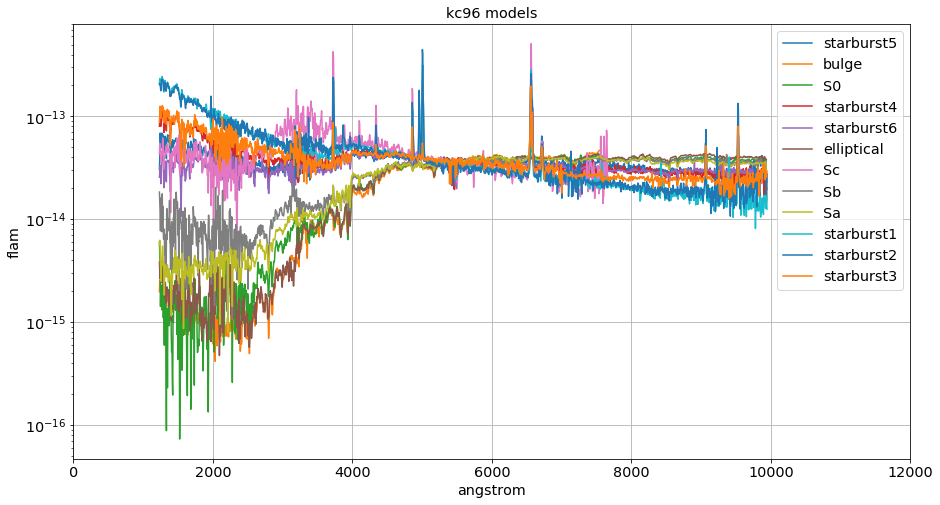

In [25]:
for keyobj in OBJDict:
    the_file=OBJDict[keyobj]
        
    selected_file=the_file
    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
    sed=S.FileSpectrum(selected_fullfile)
        
    plt.semilogy(sed.wave,sed.flux,label=keyobj)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("kc96 models")
    plt.savefig("kc96.png")